In [178]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px 
from sklearn.preprocessing import MinMaxScaler

In [179]:
df = pd.read_csv("CV_LatLon_21Jan_12Mar.csv")
df.tail()

,Unnamed: 0,state,country,lat,lon,date,confirmed,recovered,death
20701,20701,"Oakland, MI",US,42.5922,-83.3362,3/12/20,0,0,0
20702,20702,"Wayne, MI",US,42.2791,-83.3362,3/12/20,0,0,0
20703,20703,"New Castle, DE",US,39.5393,-75.6674,3/12/20,0,0,0
20704,20704,0,Cuba,22.0000,-80.0000,3/12/20,3,0,0
20705,20705,0,Guyana,5.0000,-58.7500,3/12/20,1,0,1


In [180]:
df.columns

Index(['Unnamed: 0', 'state', 'country', 'lat', 'lon', 'date', 'confirmed',
       'recovered', 'death'],
      dtype='object')

In [181]:
f = lambda x: (x["date"].split('/'))[0] 
df["month"] = df.apply(f, axis=1)
df.head()

,Unnamed: 0,state,country,lat,lon,date,confirmed,recovered,death,month
0,0,0,Thailand,15.0000,101.0000,1/22/20,2,0,0,1
1,1,0,Japan,36.0000,138.0000,1/22/20,2,0,0,1
2,2,0,Singapore,1.2833,103.8333,1/22/20,0,0,0,1
3,3,0,Nepal,28.1667,84.2500,1/22/20,0,0,0,1
4,4,0,Malaysia,2.5000,112.5000,1/22/20,0,0,0,1


In [182]:
df=pd.DataFrame(df.groupby(["country","lat","lon","date","month"])['confirmed','recovered','death'].sum())


<ipython-input-182-7ec57de9cd60>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [183]:
for i in df.index.names:
    df[i] = df.index.get_level_values(i)

In [184]:

df.head(200)


confirmed  recovered  death  \
country     lat     lon     date    month                                
Afghanistan 33.0000 65.0000 1/22/20 1              0          0      0   
                            1/23/20 1              0          0      0   
                            1/24/20 1              0          0      0   
                            1/25/20 1              0          0      0   
                            1/26/20 1              0          0      0   
...                                              ...        ...    ...   
Andorra     42.5063 1.5218  3/12/20 3              1          1      0   
                            3/2/20  3              1          0      0   
                            3/3/20  3              1          0      0   
                            3/4/20  3              1          0      0   
                            3/5/20  3              1          0      0   

                                               country      lat      lon  \
country     lat     lon     date    month                                  
Afghanistan 33.0000 65.0000 1/22/20 1      Afghanistan  33.0000  65.0000   
                            1/23/20 1      Afghanistan  33.0000  65.0000   
                            1/24/20 1      Afghanistan  33.0000  65.0000   
                            1/25/20 1      Afghanistan  33.0000  65.0000   
                            1/26/20 1      Afghanistan  33.0000  65.0000   
...                                                ...      ...      ...   
Andorra     42.5063 1.5218  3/12/20 3          Andorra  42.5063   1.5218   
                            3/2/20  3          Andorra  42.5063   1.5218   
                            3/3/20  3          Andorra  42.5063   1.5218   
                            3/4/20  3          Andorra  42.5063   1.5218   
                            3/5/20  3          Andorra  42.5063   1.5218   

                                              date month  
country     lat     lon     date    month                 
Afghanistan 33.0000 65.0000 1/22/20 1      1/22/20     1  
                            1/23/20 1      1/23/20     1  
                            1/24/20 1      1/24/20     1  
                            1/25/20 1      1/25/20     1  
                            1/26/20 1      1/26/20     1  
...                                            ...   ...  
Andorra     42.5063 1.5218  3/12/20 3      3/12/20     3  
                            3/2/20  3       3/2/20     3  
                            3/3/20  3       3/3/20     3  
                            3/4/20  3       3/4/20     3  
                            3/5/20  3       3/5/20     3  

[200 rows x 8 columns]

In [185]:
# We have no null data see:
df.isnull().sum()


confirmed    0
recovered    0
death        0
country      0
lat          0
lon          0
date         0
month        0
dtype: int64

In [186]:
df_February = df[(df.month == '2')]


In [187]:
df_February.head()

confirmed  recovered  death      country  \
country     lat  lon  date    month                                             
Afghanistan 33.0 65.0 2/1/20  2              0          0      0  Afghanistan   
                      2/10/20 2              0          0      0  Afghanistan   
                      2/11/20 2              0          0      0  Afghanistan   
                      2/12/20 2              0          0      0  Afghanistan   
                      2/13/20 2              0          0      0  Afghanistan   

                                      lat   lon     date month  
country     lat  lon  date    month                             
Afghanistan 33.0 65.0 2/1/20  2      33.0  65.0   2/1/20     2  
                      2/10/20 2      33.0  65.0  2/10/20     2  
                      2/11/20 2      33.0  65.0  2/11/20     2  
                      2/12/20 2      33.0  65.0  2/12/20     2  
                      2/13/20 2      33.0  65.0  2/13/20     2

In [188]:
scaler = MinMaxScaler()

scaler.fit(df_February[['confirmed']])
df_February['confirmed_scaled'] = scaler.transform(df_February[['confirmed']]) 

scaler.fit(df_February[['recovered']])
df_February['recovered_scaled'] = scaler.transform(df_February[['recovered']])

scaler.fit(df_February[['death']])
df_February['death_scaled'] = scaler.transform(df_February[['death']])

<ipython-input-188-446787cc4232>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-188-446787cc4232>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-188-446787cc4232>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
df_February.head()

confirmed  recovered  death      country  \
country     lat  lon  date    month                                             
Afghanistan 33.0 65.0 2/1/20  2              0          0      0  Afghanistan   
                      2/10/20 2              0          0      0  Afghanistan   
                      2/11/20 2              0          0      0  Afghanistan   
                      2/12/20 2              0          0      0  Afghanistan   
                      2/13/20 2              0          0      0  Afghanistan   

                                      lat   lon     date month  \
country     lat  lon  date    month                              
Afghanistan 33.0 65.0 2/1/20  2      33.0  65.0   2/1/20     2   
                      2/10/20 2      33.0  65.0  2/10/20     2   
                      2/11/20 2      33.0  65.0  2/11/20     2   
                      2/12/20 2      33.0  65.0  2/12/20     2   
                      2/13/20 2      33.0  65.0  2/13/20     2   

                                     confirmed_scaled  recovered_scaled  \
country     lat  lon  date    month                                       
Afghanistan 33.0 65.0 2/1/20  2                   0.0               0.0   
                      2/10/20 2                   0.0               0.0   
                      2/11/20 2                   0.0               0.0   
                      2/12/20 2                   0.0               0.0   
                      2/13/20 2                   0.0               0.0   

                                     death_scaled  
country     lat  lon  date    month                
Afghanistan 33.0 65.0 2/1/20  2               0.0  
                      2/10/20 2               0.0  
                      2/11/20 2               0.0  
                      2/12/20 2               0.0  
                      2/13/20 2               0.0

In [190]:
k_range = range(1,15)

list_dist = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_February[['confirmed_scaled','recovered_scaled','death_scaled']])
    list_dist.append(model.inertia_)

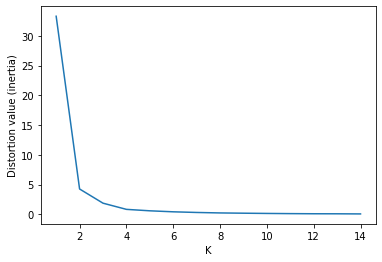

In [191]:
plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [192]:
# Let's build a K-Means model for K = 4:
model = KMeans(n_clusters=4)
y_predicted = model.fit_predict(df_February[['confirmed_scaled','recovered_scaled','death_scaled']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
df_February['cluster'] = y_predicted
df_February

<ipython-input-193-f4503f627840>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



confirmed  recovered  death  \
country     lat  lon   date    month                                
Afghanistan 33.0 65.0  2/1/20  2              0          0      0   
                       2/10/20 2              0          0      0   
                       2/11/20 2              0          0      0   
                       2/12/20 2              0          0      0   
                       2/13/20 2              0          0      0   
...                                         ...        ...    ...   
Vietnam     16.0 108.0 2/5/20  2              8          1      0   
                       2/6/20  2             10          1      0   
                       2/7/20  2             10          1      0   
                       2/8/20  2             13          1      0   
                       2/9/20  2             13          1      0   

                                          country   lat    lon     date month  \
country     lat  lon   date    month                                            
Afghanistan 33.0 65.0  2/1/20  2      Afghanistan  33.0   65.0   2/1/20     2   
                       2/10/20 2      Afghanistan  33.0   65.0  2/10/20     2   
                       2/11/20 2      Afghanistan  33.0   65.0  2/11/20     2   
                       2/12/20 2      Afghanistan  33.0   65.0  2/12/20     2   
                       2/13/20 2      Afghanistan  33.0   65.0  2/13/20     2   
...                                           ...   ...    ...      ...   ...   
Vietnam     16.0 108.0 2/5/20  2          Vietnam  16.0  108.0   2/5/20     2   
                       2/6/20  2          Vietnam  16.0  108.0   2/6/20     2   
                       2/7/20  2          Vietnam  16.0  108.0   2/7/20     2   
                       2/8/20  2          Vietnam  16.0  108.0   2/8/20     2   
                       2/9/20  2          Vietnam  16.0  108.0   2/9/20     2   

                                      confirmed_scaled  recovered_scaled  \
country     lat  lon   date    month                                       
Afghanistan 33.0 65.0  2/1/20  2              0.000000          0.000000   
                       2/10/20 2              0.000000          0.000000   
                       2/11/20 2              0.000000          0.000000   
                       2/12/20 2              0.000000          0.000000   
                       2/13/20 2              0.000000          0.000000   
...                                                ...               ...   
Vietnam     16.0 108.0 2/5/20  2              0.000121          0.000034   
                       2/6/20  2              0.000151          0.000034   
                       2/7/20  2              0.000151          0.000034   
                       2/8/20  2              0.000196          0.000034   
                       2/9/20  2              0.000196          0.000034   

                                      death_scaled  cluster  
country     lat  lon   date    month                         
Afghanistan 33.0 65.0  2/1/20  2               0.0        0  
                       2/10/20 2               0.0        0  
                       2/11/20 2               0.0        0  
                       2/12/20 2               0.0        0  
                       2/13/20 2               0.0        0  
...                                            ...      ...  
Vietnam     16.0 108.0 2/5/20  2               0.0        0  
                       2/6/20  2               0.0        0  
                       2/7/20  2               0.0        0  
                       2/8/20  2               0.0        0  
                       2/9/20  2               0.0        0  

[11774 rows x 12 columns]

In [194]:
figure = px.scatter_mapbox(df_February, lat='lat', lon='lon',
                      
                       center = dict(lat = 30.9756, lon = 112.2707), # This is the coordinate of San Francisco..
                       zoom = 5,                                # Zoom of the map
                       opacity = .9,
                       color = 'cluster',                       # Map will draw scatter colors according to cluster number..
                       title = 'February Covid',
                       mapbox_style="carto-darkmatter",
                       color_continuous_scale=px.colors.sequential.Rainbow, 
                       width = 1300,
                       height = 800,                
                       hover_data = ['cluster', 'confirmed', 'recovered', 'death']
                       )

figure.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


figure.show()